# Store Location Analysis Using Heatmaps

Each heatmap gives a different perspective on customer behavior and demographics. Explanations are in simple English.

In [60]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Load the customer data
df = pd.read_csv("../data/Customers3.csv")

## 1. Correlation Heatmap
Shows how different numeric features (like age, purchase amount, previous purchases) are related. High correlation means the features move together.

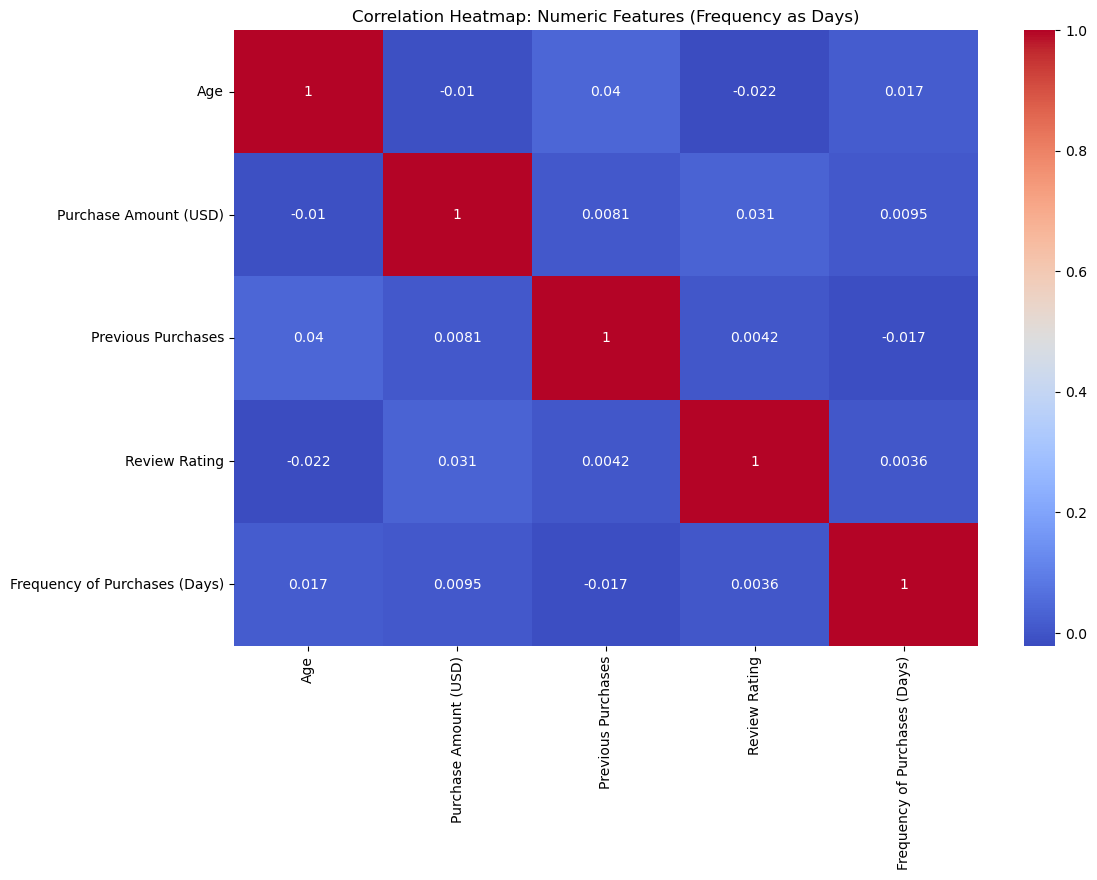

In [98]:

# Convert 'Frequency of Purchases' into numeric values (days)
freq_map = {
    'Weekly': 7,
    'Bi-Weekly': 14,
    'Fortnightly': 14,
    'Monthly': 30,
    'Quarterly': 90,
    'Annually': 365,
    'Every 3 Months': 90
}
df['Frequency of Purchases (Days)'] = df['Frequency of Purchases'].map(freq_map)

# Calculate the correlation including the new numeric column.
cols = ["Age", "Purchase Amount (USD)", "Previous Purchases", "Review Rating", "Frequency of Purchases (Days)"]
df_corr = df[cols].apply(pd.to_numeric, errors='coerce')
corr = df_corr.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Numeric Features (Frequency as Days)")
plt.show()



## 2. Clustered Heatmap
Groups locations with similar purchase behavior. Helps find states where customers spend and buy more.

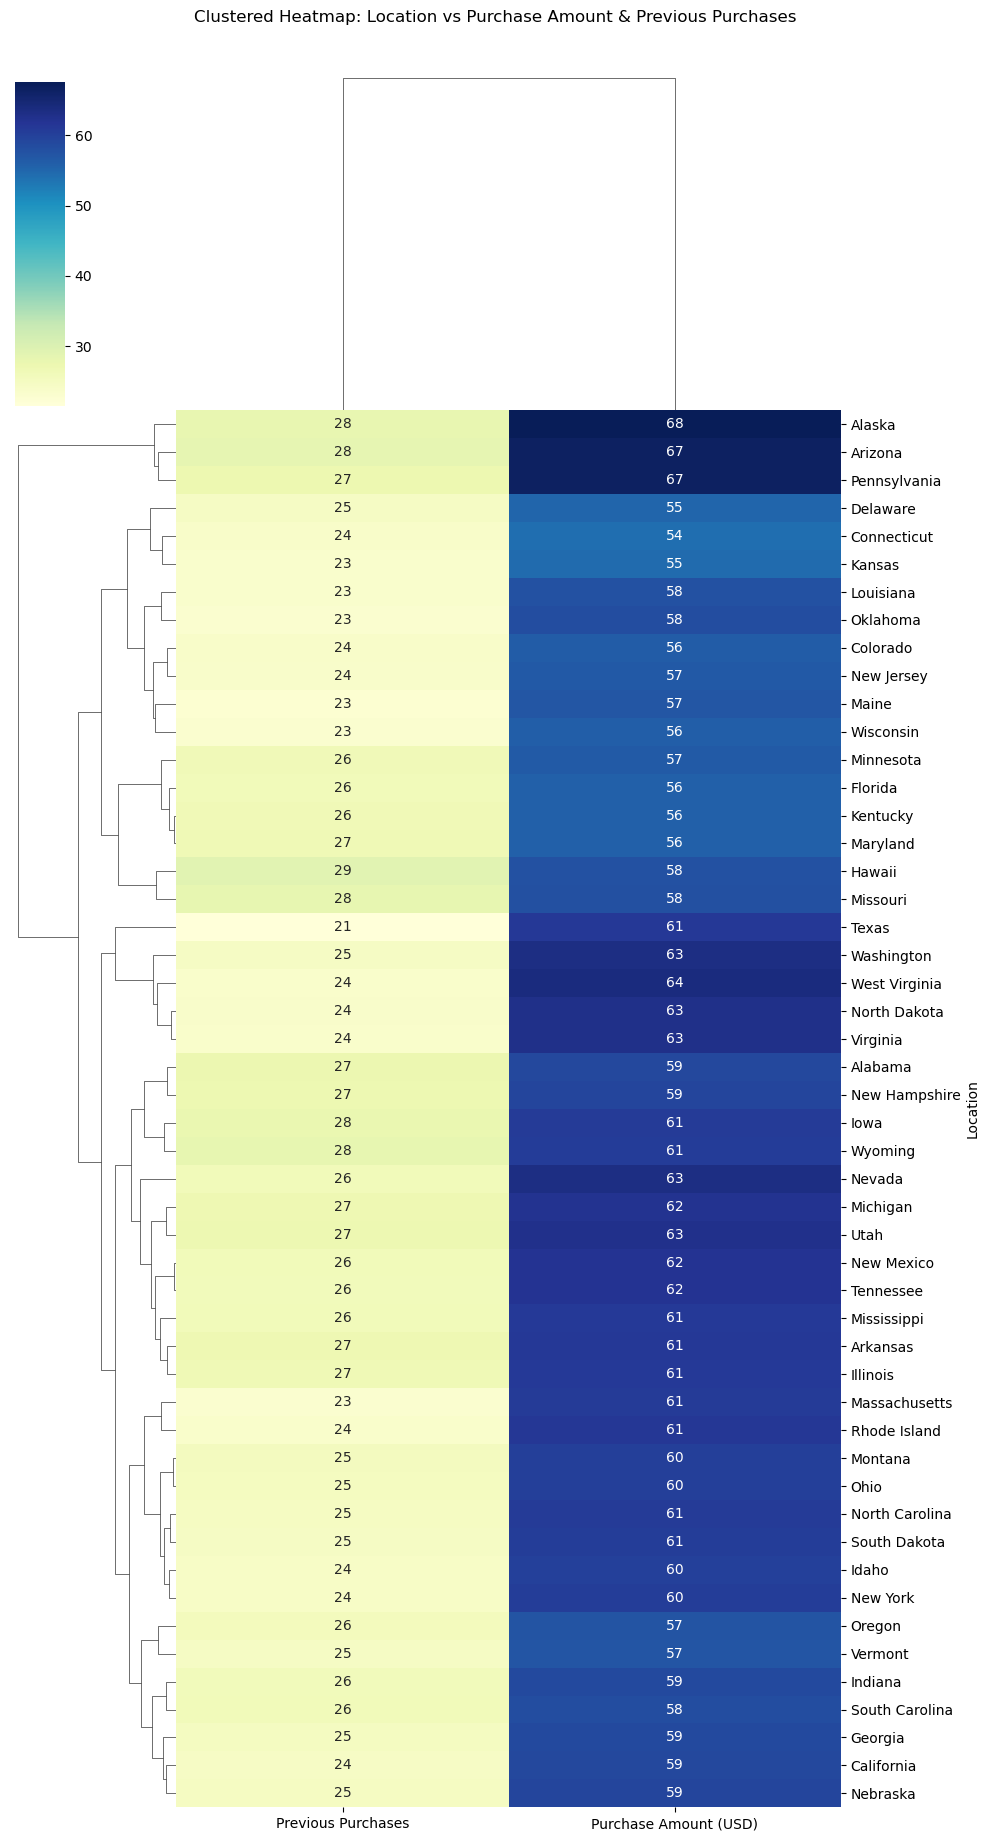

In [76]:
pivot1 = df.pivot_table(index="Location", values=["Purchase Amount (USD)", "Previous Purchases"], aggfunc="mean")
sns.clustermap(pivot1, annot=True, cmap='YlGnBu', figsize=(10,18))
plt.suptitle("Clustered Heatmap: Location vs Purchase Amount & Previous Purchases", y=1.02)
plt.show()

Top states to consider for opening a new store:

- Alaska
- Pennsylvania
- Connecticut
- Louisiana
- Colorado
- Maine
- Minnesota
- Kentucky
- Hawaii
- Texas

These states have the highest average purchase amounts and previous purchases according to your data.

Open the new store in one of these states (especially Alaska, Pennsylvania, Connecticut, Louisiana, Colorado, or Texas) to maximize sales and customer engagement.

## 3. Gender Distribution Heatmap (Diverging Palette)
Shows which locations have more female or male customers. Useful for brands targeting young women.

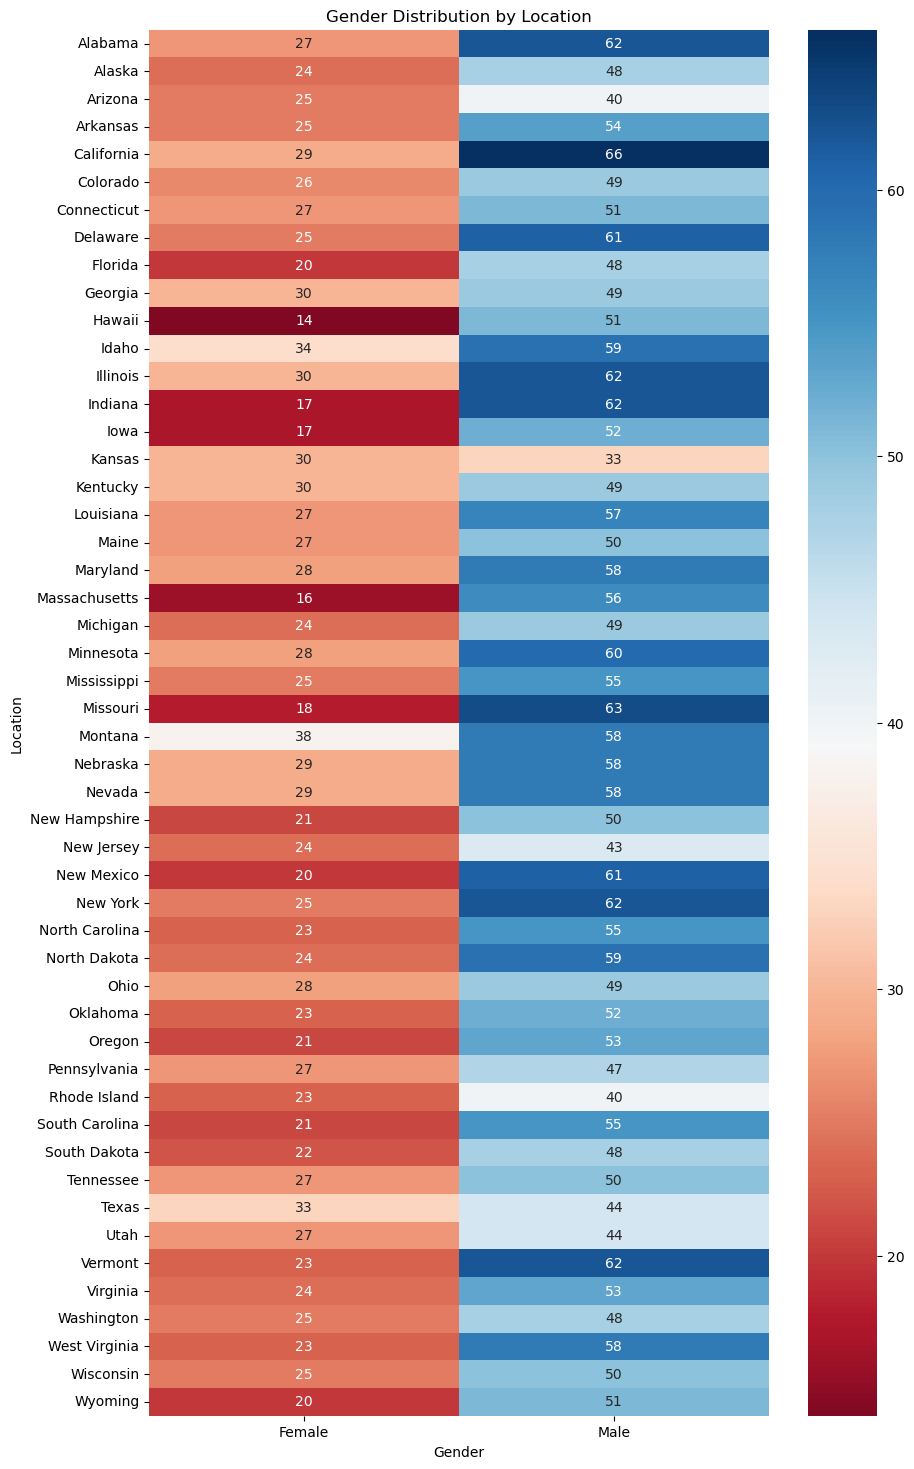

In [75]:
pivot2 = df.pivot_table(index="Location", columns="Gender", values="Customer ID", aggfunc="count", fill_value=0)
plt.figure(figsize=(10,18))
sns.heatmap(pivot2, annot=True, cmap='RdBu', center=pivot2.values.mean())
plt.title("Gender Distribution by Location")
plt.show()


From the chart, the states with the most female customers are:
* Illinois (34)
* Montana (38)
* California (29)
* Kentucky (30)
* Georgia (30)
* Nebraska (29)
* Connecticut (27)
* Maine (27)
* Texas (33)

## 4. Age Distribution Heatmap (Sequential Palette)
Shows the average age of customers in each location. Helps find states with younger shoppers.

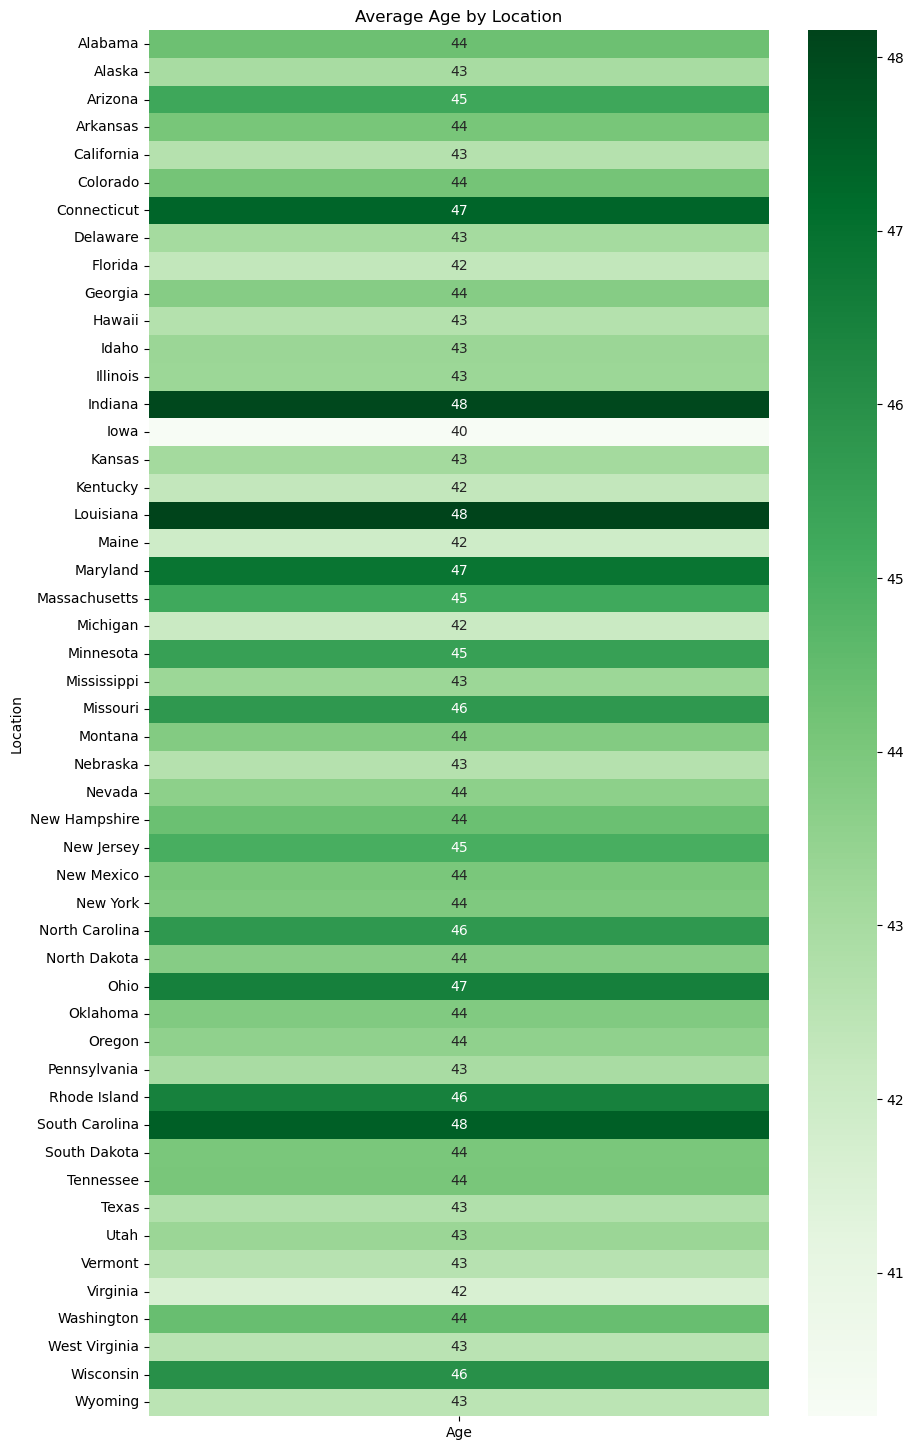

In [101]:
pivot3 = df.pivot_table(index="Location", values="Age", aggfunc="mean")
plt.figure(figsize=(10,18))
sns.heatmap(pivot3, annot=True, cmap='Greens')
plt.title("Average Age by Location")
plt.show()


#pivot3_youngest = pivot3.sort_values("Age").head(10)


Darker green colors indicate higher average ages, lighter green means lower average ages.

## 5. Subscription Status Heatmap (Categorical Palette)
Shows where customers are more engaged (subscribed). More subscriptions mean more loyal customers.

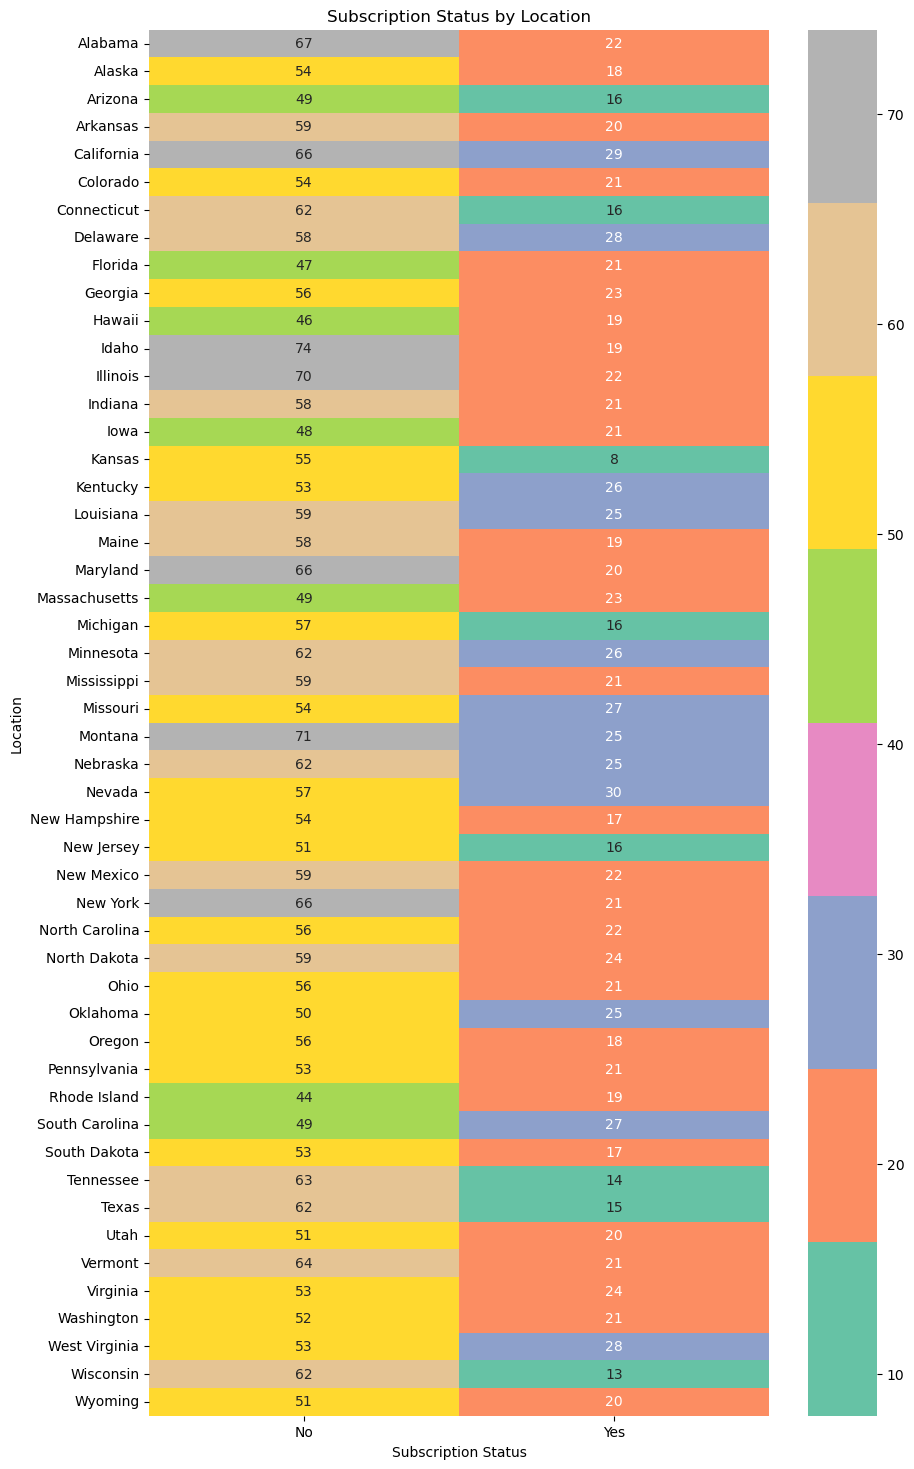

In [79]:
pivot4 = df.pivot_table(index="Location", columns="Subscription Status", values="Customer ID", aggfunc="count", fill_value=0)
plt.figure(figsize=(10,18))
sns.heatmap(pivot4, annot=True, cmap='Set2')
plt.title("Subscription Status by Location")
plt.show()

If you want to open a store where there are more loyal customers
> States with more loyal (subscribed) customers:
* Massachusetts (23)
* Missouri (27)
* Kentucky (26)
* Minnesota (26)
* Louisiana (25)
* Nebraska (25)
* Montana (25)
* Oklahoma (25)
* South Carolina (27)
* North Dakota (24)
* Virginia (24)


If we want to open a store where you can attract new customers (not yet subscribed)
>States with more potential new customers:
* Idaho (74)
* Illinois (70)
* Montana (71)
* California (66)
* Maryland (66)
* New York (66)
* Vermont (64)
* Connecticut (62)
* Nebraska (62)
* Texas (62)


## 6. Bubble Heatmap (Bubble Chart)
Shows purchase amount and previous purchases for each location as bubbles. Bigger and darker bubbles mean more purchases and higher spending.

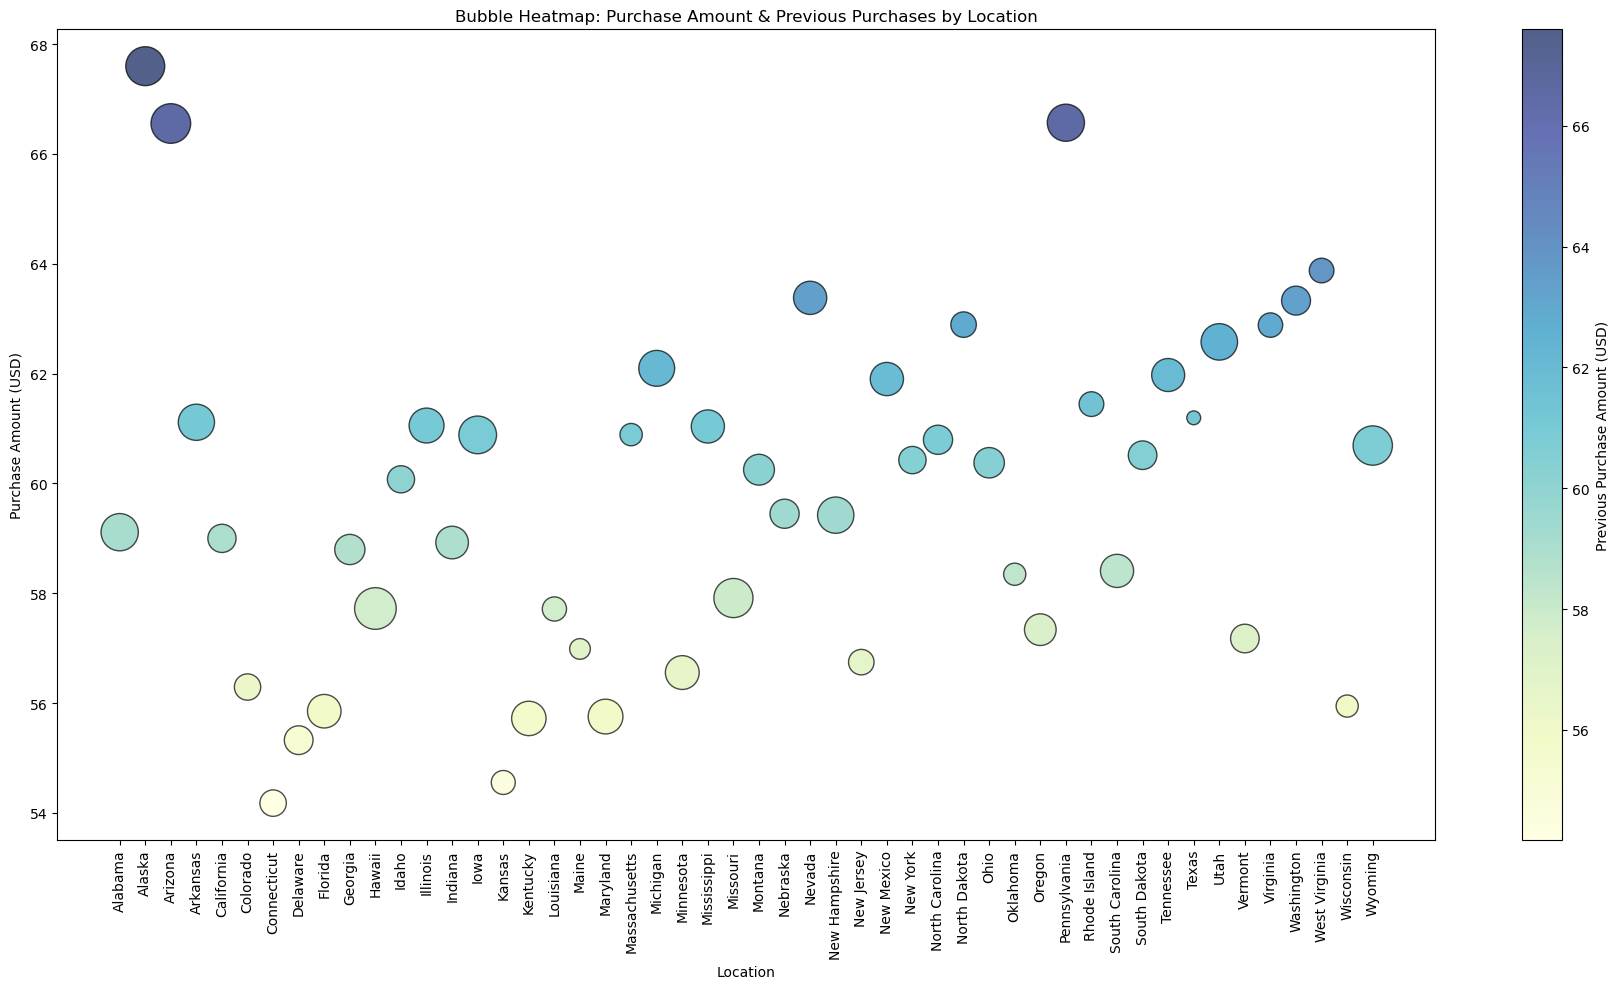

In [83]:
import numpy as np
plt.figure(figsize=(18,10))
x = np.arange(len(pivot1.index))
y1 = pivot1["Purchase Amount (USD)"]
y2 = pivot1["Previous Purchases"]

# Scale bubble sizes for better visual difference
sizes = (y2 - y2.min()) / (y2.max() - y2.min()) * 800 + 100

plt.scatter(x, y1, s=sizes, c=y1, cmap='YlGnBu', alpha=0.7, edgecolors='black')
plt.xticks(x, pivot1.index, rotation=90)
plt.xlabel("Location")
plt.ylabel("Purchase Amount (USD)")
plt.title("Bubble Heatmap: Purchase Amount & Previous Purchases by Location")
cbar = plt.colorbar()
cbar.set_label('Previous Purchase Amount (USD)')
plt.tight_layout()
plt.show()